# Qiskit Tests
The main objective of this notebook is to run the randomized protocol in the servers of IBM and test how this algorithm perform in real quantum hardware. However, we will start with some base-level qiskit programming, as we need to learn Qiskit first.

## Circuit Basics

In [1]:
import numpy as np
from qiskit import QuantumCircuit

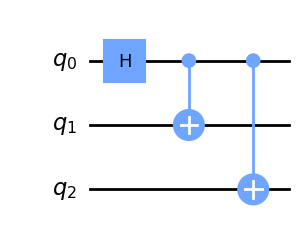

In [2]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)
#visualize the circuit
circ.draw('mpl')

In [3]:
from qiskit.quantum_info import Statevector

# Set the initial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)

# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [4]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(state)

<IPython.core.display.Latex object>

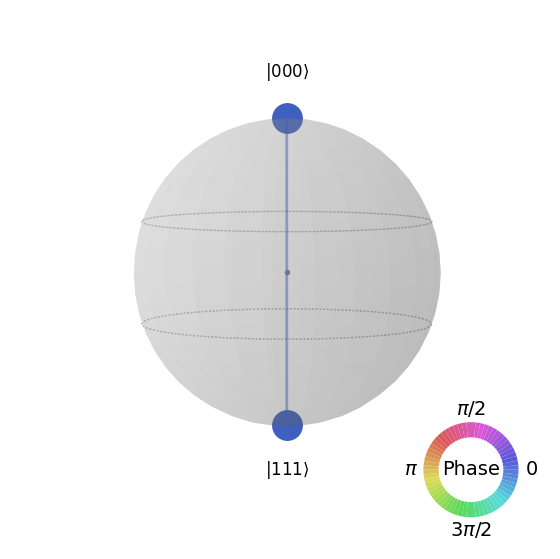

In [5]:
state.draw('qsphere')

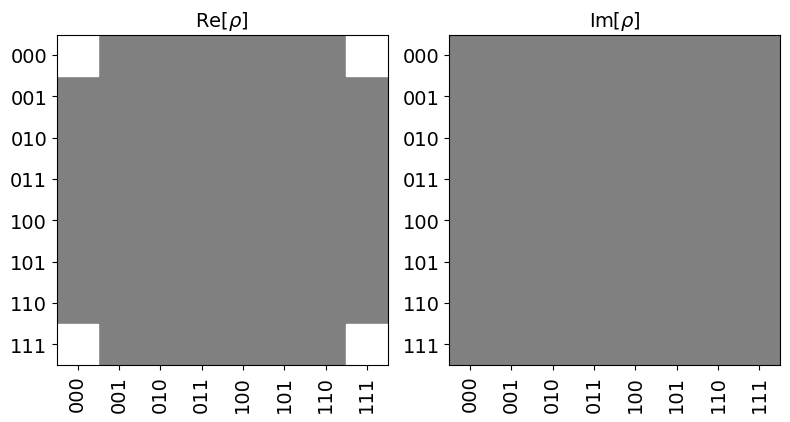

In [6]:
state.draw('hinton')

In [7]:
from qiskit.quantum_info import Operator

U = Operator(circ)

# Show the results
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

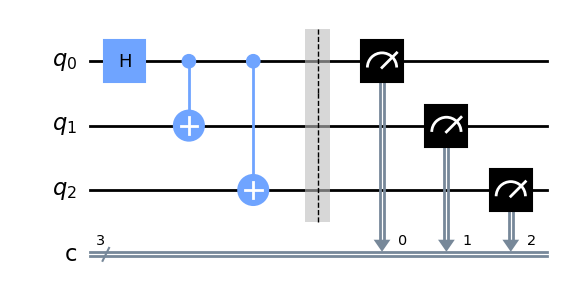

In [8]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before)
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(3), front=True)

#drawing the circuit
qc.draw('mpl')

In [9]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile, Aer, execute


backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots = 1024)
result = job.result()
count = result.get_counts(qc)
count

{'111': 505, '000': 519}

In [10]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile

# Use AerSimulator
from qiskit_aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

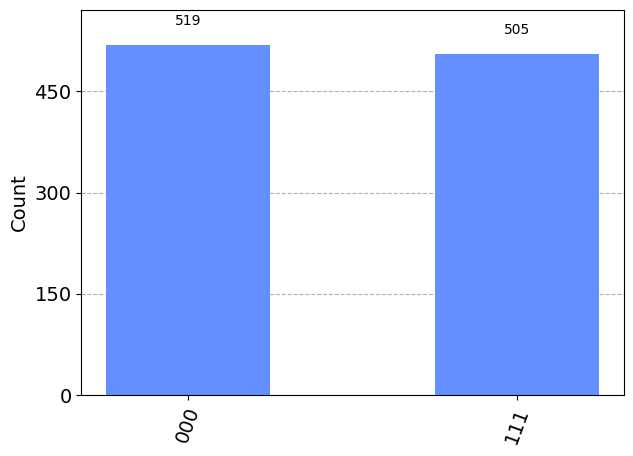

In [11]:
from qiskit.visualization import plot_histogram
plot_histogram(count)

## Translation
Here we begin with the translation of myfunctions.py from Qibo to Qiskit.
Down below I have programed a simple circuit in order to simulate it and measure only the interested qubits.

{'111': 509, '110': 515}


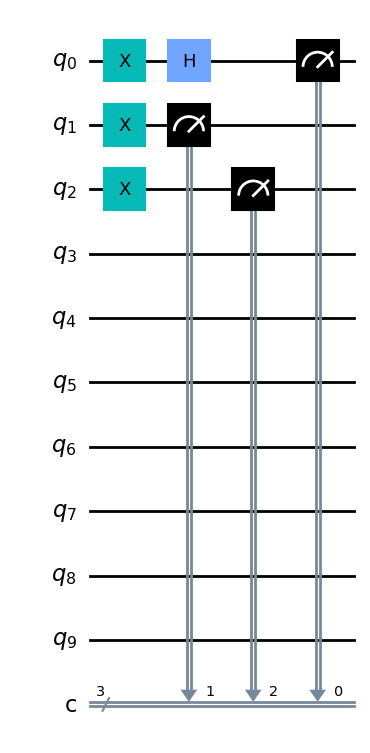

In [2]:
from qiskit.quantum_info import random_unitary as U
from qiskit import QuantumCircuit
from qiskit.extensions import UnitaryGate
from qiskit import Aer, execute

N_A = [0,1,2]
c= QuantumCircuit(10,3)
for i in N_A:
            c.x(i)
c.h(0)

c.measure(N_A,range(len(N_A)))


backend = Aer.get_backend('qasm_simulator')
job = execute(c, backend, shots = 1024)
result = job.result()
count = result.get_counts(c)
count
print(count)

c.draw('mpl')

## Random protocol to Qiskit
Down below (simulator)
In order to send multiple jobs into the quantum circuit, we need to create previously the circuits and send them all togheter in a list. We need now to run some tests on the simulator.

In [3]:
#create random circuit generator to test the creation of multiple circuits
#in order to send them lates in a list

def Random_Circuit(circuit: QuantumCircuit, N_A: list):
    c = circuit
    gate_list = []
    #Random unitary gates are applied.     
    for i in N_A:
        U_gate = U(2)
        gate_list.append(U_gate)
        gate = UnitaryGate(U_gate)
        c.append(U_gate, [i])
    c.measure(N_A,range(len(N_A)))

    return c

N_A = [0,1,2]
N_U = 100
N_M = 100
qc_list = []
simulator = Aer.get_backend('qasm_simulator')

circuit = QuantumCircuit(6,len(N_A))
circuit.h(0)
for i in range(5):
    circuit.cx(i, i+1)
for _ in range(N_U):
    c_copy = circuit.copy()
    random_circuit = Random_Circuit(c_copy, N_A)
    qc_list.append(random_circuit)

job = execute(qc_list, simulator, shots=N_M)
result = job.result()
counts = result.get_counts()

print(counts[0])

#This part is to check how I can acces the counts
for i in counts[0]:
    print(i)
    print(counts[0][i])

{'010': 30, '011': 19, '101': 22, '100': 25, '111': 1, '001': 1, '110': 1, '000': 1}
010
30
011
19
101
22
100
25
111
1
001
1
110
1
000
1


Here we take part of the randomized protocol to test it on qiskit.

In [4]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import random_unitary as U
from scipy.spatial.distance import hamming
from qiskit import Aer, execute # Use AerSimulator
simulator = Aer.get_backend('qasm_simulator')

# Randomized method to find 2-order Rényi entropy. Not purely theoretical, but nshots are made.


class Randomized_Renyi_2():
    
    def __init__(self) -> None:
        self.entropy_value = None
        self.entropy_error = None
        self.number_measurements = None
        self.number_A = None
        self.getU_matrix = None
        self.freq_list = None
        self.original1 = None
        self.p3 = None

    def Random_Circuit(self, circuit: QuantumCircuit, N_A: list):
        '''
        Given a circuit, this function adds some random unitary gates (fallowing the haar measure) to it,
        into the qubits found at subsystem A, performs the measure on those qubits and returns the 
        overall quantum circuit.
        Parameters:
            circuit: quantum circuit representing the state we want to measure the entropy of.
            N_A: list containing the position of the qubits of subsytem A.
        '''
        c = circuit
    
        #Random unitary gates are applied.     
        for i in N_A:
            U_gate = U(2)
            gate = UnitaryGate(U_gate)
            c.append(gate, [i])
        c.measure(N_A,range(len(N_A)))

        return c

    def X_fun(self, freq: dict, N_A: list, N_M: int):
        '''
        This functions estimates the purtiy of subsystem A, tr(rho_A**2) given the statistical data obtained by
        the simulation.
        Parameters:
            freq: obtained counts from the qiskit simulation execution of echa of the the multiple circuits.
            N_A: list of qubits that constitue subspace A. 
            N_M: number of measurement per each unitary ensamble.
        '''
        #Formula is applied, summing over all probabilities twice and computing the hamming distance.
        x_list = []
        x_error = []
        for i in freq:
            j_iter = 0
            j_error = 0
            for j in freq:
                count = 0
                count_error = 0
                d = hamming(list(str(i)), list(str(j)))*len(N_A)
                if i == j:
                    count = (-2)**(-d)*(((freq[i]/N_M)*(freq[i] - 1))/(N_M - 1))
                    count_error = (-2)**(-d)*(2*freq[i] - 1)/(N_M - 1)*np.sqrt((freq[i]/N_M)*(1-(freq[i]/N_M))/N_M)
                else:
                    count = (-2)**(-d)*freq[i]*freq[j]/(N_M**2)
                    count_error = (-2)**(-d)*np.sqrt(((freq[j]/N_M)*np.sqrt((freq[i]/N_M)*(1-(freq[i]/N_M))/N_M))**2 + ((freq[i]/N_M)*np.sqrt((freq[j]/N_M)*(1-(freq[j]/N_M))/N_M))**2)
                    
                j_iter += count
                j_error += count_error**2
            x_list.append(j_iter)
            x_error.append(np.sqrt(j_error))

        X = 2**len(N_A)*np.sum(x_list)
        x_error = np.array(x_error)
        X_error = 2**len(N_A)*np.sqrt(np.sum(x_error**2))
        
        return X , X_error, freq

    def Local(self, circuit: QuantumCircuit, N_A: list, N_U: int, N_M: int):
        '''
        It computes the 2-Réyni entropy of the circuit following the local randomized unitary protocol.
        Parameters:
            circuit: initial circuit where the funcion is applied. It must represent the state we want to estimate the entropy of.
            N_A: list of qubits' position that constitue subspace A.
            N_U: number of fixed local unitary ensambles we are performing.
            N_M: number of measurements for each unitary ensamble.
        '''
        super_list = []
        super_error = []
        super_freq = []
        qc_list = []

        for _ in range(N_U):
            c_copy = circuit.copy()
            random_circuit = self.Random_Circuit(c_copy, N_A)
            qc_list.append(random_circuit)

        job = execute(qc_list, simulator, shots = N_M)
        result = job.result()
        counts = result.get_counts()
        
        for i in range(N_U):
            X, X_error, freq = self.X_fun(counts[i], N_A, N_M)
            super_list.append(X)
            super_error.append(X_error)
            super_freq.append(freq)
        X_mean = np.mean(super_list)
        super_error = np.array(super_error)
        X_std = 1/N_U*np.sqrt(np.sum(super_error**2))
        S_2 = - np.log2(X_mean)
        S_2_error = X_std/(X_mean*np.log(2))


        
        self.entropy_value = S_2
        self.entropy_error = S_2_error
        self.freq_list = super_freq

In [5]:
#Test with GHZ circuit

nqubits = 10
N_A = [0,1,2]
c= QuantumCircuit(nqubits,len(N_A))
c.h(0)
for i in range(0, nqubits-1):
    c.cx(i, i+1)


f = Randomized_Renyi_2()
f.Local(c, N_A, 1000, 1000)
print(f.entropy_value, '+-', f.entropy_error)

1.000000934138843 +- 0.008393581254513635


Now, I tried to implement the execution of the circuit into a real IBM quantum hardware. Proble is that there was an error (AttributeError: 'SamplerResult' object has no attribute 'get_counts') and I had to take the data from IBM and make a little function to estimate the final value. It was sent to 'bellem' with N_U = 1000 and N_M = 1000.

So, I took the tough data from IBM quantum platform and post it in 'first_try.txt'.

In [62]:
def convertor(filename: str):
    '''
    Takes the data the IBM Quantum Platform results and resturns them as a list
    that can be easily accessed and used during future calculations.
    '''
    from pandas import json_normalize
    import json

    with open(filename, 'rb') as fp:
        details = fp.read()
        df = json_normalize(json.loads(details)).T

    dictionary = df.to_dict().values()
    freq = list(dictionary)

    return freq


In [70]:
freq = convertor('first_try.txt')
print(freq)
print(len(freq))

[{'100': 0.24149005840054136, '101': 0.1370900105109226, '110': 0.09654862961242586, '111': 0.040458628577332595, '000': 0.038500495141926876, '001': 0.0773870813592755, '010': 0.0998219706256145, '011': 0.2687031257719607}, {'100': 0.13483314806753402, '101': 0.15656467506285296, '110': 0.06582473567373, '111': 0.08011088732760328, '000': 0.1209971244111885, '001': 0.1079047037263455, '010': 0.1547061456280561, '011': 0.17905858010268963}, {'100': 0.279695852665213, '101': 0.13984963336841344, '110': 0.03627160622746735, '111': 0.0449654465486012, '000': 0.03727196732328509, '001': 0.01612352050970923, '010': 0.15192357088251549, '011': 0.29389840247479515}, {'100': 0.09693754602718432, '101': 0.17194597668062364, '110': 0.10468487599596565, '111': 0.12363161839535855, '000': 0.1342849313759216, '001': 0.08493877794570658, '010': 0.19397716925225458, '011': 0.0895991043269851}, {'100': 0.14864071533562934, '101': 0.12081590144809722, '110': 0.12818680786642633, '111': 0.11477144781717

In [75]:
def Read_IBM_data(freq: dict, N_A: list, N_M: int):
    '''
    This functions estimates the purtiy of subsystem A, tr(rho_A**2), with a fixed set of local random unitaries, for N_A a list containing 
    the qubits that form part of such subspace.
    Parameters:
        circuit: circuit that represents the initial state we want to estimate the entropy of.
        N_A: list of qubits that constitue subspace A. 
        N_M: number of measurement per each unitary ensamble.
    '''
    from scipy.spatial.distance import hamming
    import numpy as np

    x_list = []
    x_error = []
    for i in freq:
        j_iter = 0
        j_error = 0
        for j in freq:
            count = 0
            count_error = 0
            freq[i] = np.abs(freq[i])
            freq[j] = np.abs(freq[j])
            d = hamming(list(str(i)), list(str(j)))*len(N_A)
            if i == j:
                count = (-2)**(-d)*(((freq[i])*(freq[i]*N_M - 1))/(N_M - 1))
                count_error = (-2)**(-d)*(2*freq[i]*N_M - 1)/(N_M - 1)*np.sqrt((freq[i])*(1-(freq[i]))/N_M)
            else:
                count = (-2)**(-d)*freq[i]*freq[j]
                count_error = (-2)**(-d)*np.sqrt(((freq[j])*np.sqrt((freq[i])*(1-(freq[i]))/N_M))**2 + ((freq[i])*np.sqrt((freq[j])*(1-(freq[j]))/N_M))**2)
                
            j_iter += count
            j_error += count_error**2
        x_list.append(j_iter)
        x_error.append(np.sqrt(j_error))

    X = 2**len(N_A)*np.sum(x_list)
    x_error = np.array(x_error)
    X_error = 2**len(N_A)*np.sqrt(np.sum(x_error**2))
    
    return X , X_error

def Renyi_2(freq:list, N_A:list, N_U:int, N_M:int):
    '''
    Computes the 2-Rényi entropy given the data collection from IBM.
    Parameters:
        freq: list obtained from convertor function with the measurement data.
        N_A: list containing the qubits of subspace A.
        N_U: number of unitary ensambles used during the execution.
        N_M: number of measurements performed during the execution.
    '''
    super_list = []
    super_error = []
    for i in range(N_U):
        X, X_error = Read_IBM_data(freq[i], N_A, N_M)   #read and transform the data
        super_list.append(X)
        super_error.append(X_error)
    X_mean = np.mean(super_list)
    super_error = np.array(super_error)
    X_std = 1/N_U*np.sqrt(np.sum(super_error**2))
    S_2 = - np.log2(X_mean)
    S_2_error = X_std/(X_mean*np.log(2))

    print('Final Entropy of the GHZ state', S_2, '+-', S_2_error)


In [76]:
N_U = 1000
N_A = [0,1,2]
N_M = 1000
freq = convertor('first_try.txt')   #acces the data

Renyi_2(freq, N_A, N_U, N_M)


Final Entropy of the GHZ state 1.2438284609431578 +- 0.009699554973969177


We try again the code here using a different sampler and a different computer. I previously used 'belem', which has a connectivity a little odd for the GHZ state. So, we are going to try again with the 'manilla' server, which presents linear connectivity.

In [73]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import random_unitary as U
from scipy.spatial.distance import hamming
import itertools
from qiskit import Aer, execute # Use AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
simulator = Aer.get_backend('qasm_simulator')

# Randomized method to find 2-order Rényi entropy. Not purely theoretical, but nshots are made.


class Randomized_Renyi_2():
    
    def __init__(self) -> None:
        self.entropy_value = None
        self.entropy_error = None
        self.number_measurements = None
        self.number_A = None
        self.getU_matrix = None
        self.freq_list = None
        self.original1 = None
        self.p3 = None

    def Random_Circuit(self, circuit: QuantumCircuit, N_A: list):
        c = circuit
    
        #Random unitary gates are applied.     
        for i in N_A:
            U_gate = U(2)
            gate = UnitaryGate(U_gate)
            c.append(gate, [i])
        c.measure(N_A,range(len(N_A)))

        return c

    def X_fun(self, freq, N_A, N_M):
        '''
        This functions estimates the purtiy of subsystem A, tr(rho_A**2), with a fixed set of local random unitaries, for N_A a list containing 
        the qubits that form part of such subspace.
        Parameters:
            circuit: circuit that represents the initial state we want to estimate the entropy of.
            N_A: list of qubits that constitue subspace A. 
            N_M: number of measurement per each unitary ensamble.
        '''
        
        #Formula is applied, summing over all probabilities twice and computing the hamming distance.
        x_list = []
        x_error = []
        for i in freq:
            j_iter = 0
            j_error = 0
            for j in freq:
                count = 0
                count_error = 0
                d = hamming(list(str(i)), list(str(j)))*len(N_A)
                freq[i] = freq[i]*N_M
                freq[j] = freq[j]*N_M
                if i == j:
                    count = (-2)**(-d)*(((freq[i]/N_M)*(freq[i] - 1))/(N_M - 1))
                    count_error = (-2)**(-d)*(2*freq[i] - 1)/(N_M - 1)*np.sqrt((freq[i]/N_M)*(1-(freq[i]/N_M))/N_M)
                else:
                    count = (-2)**(-d)*freq[i]*freq[j]/(N_M**2)
                    count_error = (-2)**(-d)*np.sqrt(((freq[j]/N_M)*np.sqrt((freq[i]/N_M)*(1-(freq[i]/N_M))/N_M))**2 + ((freq[i]/N_M)*np.sqrt((freq[j]/N_M)*(1-(freq[j]/N_M))/N_M))**2)
                    
                j_iter += count
                j_error += count_error**2
            x_list.append(j_iter)
            x_error.append(np.sqrt(j_error))

        X = 2**len(N_A)*np.sum(x_list)
        x_error = np.array(x_error)
        X_error = 2**len(N_A)*np.sqrt(np.sum(x_error**2))
        
        return X , X_error, freq

    def Local(self, circuit: QuantumCircuit, N_A: list, N_U: int, N_M: int):
        '''
        It computes the 2-Réyni entropy of the circuit following the local randomized unitary protocol.
        Parameters:
            circuit: initial circuit where the funcion is applied. It must represent the state we want to estimate the entropy of.
            N_A: list of qubits' position that constitue subspace A.
            N_U: number of fixed local unitary ensambles we are performing.
            N_M: number of measurements for each unitary ensamble.
        '''
        super_list = []
        super_error = []
        super_freq = []
        qc_list = []
        # Get the API token in https://quantum-computing.ibm.com/account
        service = QiskitRuntimeService(channel="ibm_quantum", token="256b5176fe5f51429cb1eca347d7d9b4e0eed2974a1e3a1557af2cee37a01a1d33a823e295297ede605a355b06218e9d99e502daab068d069376b83286274e48")
        backend = service.backend("ibm_perth")
        sampler = Sampler(session=backend)

        for _ in range(N_U):
            c_copy = circuit.copy()
            random_circuit = self.Random_Circuit(c_copy, N_A)
            qc_list.append(random_circuit)

        # Run the circuit and get result distribution
        job = sampler.run(qc_list, shots = N_M)
        quasi_dist = job.result().quasi_dists
        binary = quasi_dist.binary_probabilities()
        
        for i in range(N_U):
            X, X_error, freq = self.X_fun(binary[i], N_A, N_M)
            super_list.append(X)
            super_error.append(X_error)
            super_freq.append(freq)
        X_mean = np.mean(super_list)
        super_error = np.array(super_error)
        X_std = 1/N_U*np.sqrt(np.sum(super_error**2))
        S_2 = - np.log2(X_mean)
        S_2_error = X_std/(X_mean*np.log(2))


        
        self.entropy_value = S_2
        self.entropy_error = S_2_error
        self.freq_list = super_freq

In [ ]:
#Test with GHZ circuit

nqubits = 7
N_A = [0,1,3]
c= QuantumCircuit(nqubits,len(N_A))
c.h(0)
c.cx(0, 1)
c.cx(1, 3)
c.cx(3, 5)
c.cx(5, 6)


f = Randomized_Renyi_2()
f.Local(c, N_A, 1000, 1000)
print(f.entropy_value, '+-', f.entropy_error)

Once again I got an error regarding the data analisys. So, I am going to repeat the previous procedure, taking the data myself. It is strange, there are some probability values that are negative!!!

In [81]:
N_U = 1000
N_A = [0,1,3]
N_M = 1000
freq = convertor('second_try.txt')   #acces the data

Renyi_2(freq, N_A, N_U, N_M)

Final Entropy of the GHZ state 0.975816804112837 +- 0.008286061901909055
